# Proceso analisis de datos Football players Bundesliga

## Fase 1: Business Understanding

### Contexto 

La data que se va a analizar corresponmde a los datos de todos los futbolistas que se desempeñan en la la primera division de futbol prfessional alemana más conocida como la Bundesliga. 

## Fase 2: Data Understanding

Primero realizamos importacion de las librerias que utilizaremos

In [2]:

import pandas as pd
import seaborn as sbn
import numpy as np
import matplotlib.pyplot as plt
from seaborn import load_dataset
import io

Conexion a los datos alojados en github

In [3]:

#url = 'https://github.com/AlejoBovet/MachineLearningPublic/raw/main/Datas/bl2.csv'
#response = requests.get(url)
#df = pd.read_csv(response.content)

Llamado por local 

In [4]:
df = pd.read_csv('Datas/bl2.csv')

Comprobamos la cantidad de columnas y filas

In [5]:
df.shape

(515, 17)

Identificamos que el dataset cuenta con 515 filas donde cada fila representa un jugador y 17 columnas que representa las caracteristicas de los jugadores

Visualisamos los primeros campos de la data

In [6]:
df.head()

,Unnamed: 0,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter
0,0,Manuel Neuer,Manuel Peter Neuer,37,1.93,Germany,Gelsenkirchen,7.0,45.0,Goalkeeper,1,right,Bayern Munich,2024-06-30,2011-07-01,PRO Profil GmbH,adidas
1,1,Yann Sommer,NaN,34,1.83,Switzerland,Morges,5.0,13.0,Goalkeeper,27,right,Bayern Munich,2025-06-30,2023-01-19,Relatives,Puma
2,2,Sven Ulreich,NaN,34,1.92,Germany,Schorndorf,0.9,6.0,Goalkeeper,26,right,Bayern Munich,2024-06-30,2021-07-01,BMS Sportconsulting ...,adidas
3,3,Johannes Schenk,NaN,20,1.91,Germany,Schweinfurt,0.3,0.3,Goalkeeper,35,NaN,Bayern Munich,2024-06-30,2022-07-01,11WINS,NaN
4,4,Matthijs de Ligt,NaN,23,1.89,Netherlands,Leiderdorp,75.0,75.0,Defender - Centre-Back,4,right,Bayern Munich,2027-06-30,2022-07-19,Rafaela Pimenta,adidas


y ahora los ultimos

In [7]:
df.tail()

,Unnamed: 0,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter
510,510,Takuma Asano,浅野 拓磨,28,1.73,Japan,"Komono, Mie",4.00,4.0,Attack - Right Winger,11,right,VfL Bochum,2024-06-30,2021-07-01,JEB ENTERTAINMENT ...,adidas
511,511,Philipp Hofmann,NaN,30,1.95,Germany,Arnsberg,2.50,2.5,Attack - Centre-Forward,33,left,VfL Bochum,2024-06-30,2022-07-01,ROOF,NaN
512,512,Simon Zoller,Simon Martin Zoller,31,1.79,Germany,Friedrichshafen,1.10,3.0,Attack - Centre-Forward,9,right,VfL Bochum,2024-06-30,2019-01-01,GoalSky,Puma
513,513,Silvère Ganvoula,Silvère Ganvoula M'boussy,26,1.91,Congo,Brazzaville,0.75,2.5,Attack - Centre-Forward,35,right,VfL Bochum,2023-06-30,2019-07-05,BY Sport Consulting,Puma
514,514,Moritz Broschinski,NaN,22,1.90,Germany,Finsterwalde,0.50,0.5,Attack - Centre-Forward,29,right,VfL Bochum,2026-06-30,2023-01-22,Teamgeist ...,NaN


* price y max_price estan en millones de euros

Identificamos los nombres de las columnas de la data

In [8]:
print(df.columns)

Index(['Unnamed: 0', 'name', 'full_name', 'age', 'height', 'nationality',
       'place_of_birth', 'price', 'max_price', 'position', 'shirt_nr', 'foot',
       'club', 'contract_expires', 'joined_club', 'player_agent', 'outfitter'],
      dtype='object')


In [9]:
df.describe()

,Unnamed: 0,age,height,price,max_price,shirt_nr
count,515.000000,515.000000,515.000000,510.000000,510.000000,515.000000
mean,257.000000,25.683495,1.847612,8.482794,13.513627,19.798058
std,148.811962,4.700238,0.060996,14.653440,18.659222,12.414768
min,0.000000,17.000000,1.680000,0.025000,0.100000,1.000000
25%,128.500000,22.000000,1.800000,1.200000,2.500000,9.000000
50%,257.000000,25.000000,1.850000,3.500000,7.000000,20.000000
75%,385.500000,29.000000,1.890000,9.000000,16.750000,29.000000
max,514.000000,39.000000,2.000000,120.000000,150.000000,49.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        515 non-null    int64  
 1   name              515 non-null    object 
 2   full_name         229 non-null    object 
 3   age               515 non-null    int64  
 4   height            515 non-null    float64
 5   nationality       515 non-null    object 
 6   place_of_birth    510 non-null    object 
 7   price             510 non-null    float64
 8   max_price         510 non-null    float64
 9   position          515 non-null    object 
 10  shirt_nr          515 non-null    int64  
 11  foot              506 non-null    object 
 12  club              515 non-null    object 
 13  contract_expires  481 non-null    object 
 14  joined_club       515 non-null    object 
 15  player_agent      488 non-null    object 
 16  outfitter         193 non-null    object 
dt

identificamos los tipo de dato de cada columna,
donde identificamos  float64(3), int64(3), object(11)

Ahora sumaremos la cantidad de nulos que existen en las columnas

In [11]:
df.isna().sum()

Unnamed: 0            0
name                  0
full_name           286
age                   0
height                0
nationality           0
place_of_birth        5
price                 5
max_price             5
position              0
shirt_nr              0
foot                  9
club                  0
contract_expires     34
joined_club           0
player_agent         27
outfitter           322
dtype: int64

Ahora validaremos que porcentaje representan estos nulos respecto al total de datos. 

In [12]:
nulos_por_columna = df.isnull().sum()
porcentaje_nulos = ((df.isnull().sum() / df.shape[0]) * 100).apply(lambda x: f"{x:.2f}%")

df_info = pd.DataFrame({
    'Columna': nulos_por_columna.index,
    'N° de Nulos': nulos_por_columna.values,
    'Porcentaje del total de registros': porcentaje_nulos.values
})

df_info_filtered = df_info[df_info['N° de Nulos'] > 0].sort_values(by='N° de Nulos', ascending=False)

df_info_filtered

,Columna,N° de Nulos,Porcentaje del total de registros
16,outfitter,322,62.52%
2,full_name,286,55.53%
13,contract_expires,34,6.60%
15,player_agent,27,5.24%
11,foot,9,1.75%
6,place_of_birth,5,0.97%
7,price,5,0.97%
8,max_price,5,0.97%


Debido al porcentaje que representan respecto al total de datos de su columna  y por enfoque analitico que buscamos se descarta las siguientes columnas. 
Datos que se desacartan:

 - full_name
 - outfitter
 - Unnamed : 0





In [13]:
df1 = df.drop(['full_name', 'outfitter','Unnamed: 0','player_agent','contract_expires','name'], axis=1)

Se elimina tambien otras columnas que no seran necesarias para el analisis

In [14]:
df1.isna().sum()

age               0
height            0
nationality       0
place_of_birth    5
price             5
max_price         5
position          0
shirt_nr          0
foot              9
club              0
joined_club       0
dtype: int64

Para la columna place_of_birth que corresponde a la ciudad de origen del jugadores, los que posean datos nullos se imputara por el string ´desconocido´

In [15]:
df1['place_of_birth'].fillna('Desconocido', inplace=True)

Al ser solo 9 nulos en en 'foot', utilizaremos la moda para imputar estos datos, en caso de desbalanceo realizaremos el control mas adelante

In [16]:
# Calcula la moda de la columna
moda_foot = df1['foot'].mode()[0]

# Imputa los valores faltantes con la moda
df1['foot'].fillna(moda_foot, inplace=True)

Para el caso de las columas que cuentan con valores numericos continuos, realizaremos:

Primero importamos la libreria de LinearRegression que nos probee sklearn 

In [17]:
from sklearn.linear_model import LinearRegression

Despues dividimos los datos entre valores conocidos (no nulos) y valores desconocidos (nulos)

In [18]:
data_known = df1.dropna(subset=['price'])
data_unknown = df1[df1['price'].isnull()]

Ahora definimos las variables predictorias y la variable objetivo, comprobando la correlaciopn entre las variables

In [19]:
selected_columns = ['age', 'height']
correlation_with_target = df[selected_columns + ['price']].corr()['price']
print(correlation_with_target)

age      -0.103473
height   -0.075277
price     1.000000
Name: price, dtype: float64


Encontramos una correlacion negativa con las dos variable 

In [20]:
X_known = data_known[['age', 'height']]
y_known = data_known['price']
X_unknown = data_unknown[['age', 'height']]

Ahora realizamos el proceso de regresion 

In [21]:
# Crear un modelo de regresión lineal
regression_model = LinearRegression()

# Ajustar el modelo a los datos conocidos
regression_model.fit(X_known, y_known)

# Predecir los valores faltantes
predicted_values = regression_model.predict(X_unknown)

# Reemplazar los valores faltantes en el DataFrame original
df1.loc[df1['price'].isnull(), 'price'] = predicted_values

Realizamos una copia para salverguardar el proceso

In [22]:
df2 = df1.copy()

In [23]:
data_known = df2.dropna(subset=['max_price'])
data_unknown = df2[df2['max_price'].isnull()]

Ahora imputaremos 'Max price'

In [24]:
selected_columns = ['age', 'height', 'price']
correlation_with_target = df1[selected_columns + ['max_price']].corr()['max_price']
print(correlation_with_target)

age          0.093238
height      -0.089408
price        0.871134
max_price    1.000000
Name: max_price, dtype: float64


In [25]:
X_known = data_known[['age', 'height','price']]
y_known = data_known['max_price']
X_unknown = data_unknown[['age', 'height','price']]

In [26]:
# Crear un modelo de regresión lineal
regression_model = LinearRegression()

# Ajustar el modelo a los datos conocidos
regression_model.fit(X_known, y_known)

# Predecir los valores faltantes
predicted_values = regression_model.predict(X_unknown)

# Reemplazar los valores faltantes en el DataFrame original
df2.loc[df2['max_price'].isnull(), 'max_price'] = predicted_values

Validamos si aun existen nulos

In [27]:
df2.isna().sum()

age               0
height            0
nationality       0
place_of_birth    0
price             0
max_price         0
position          0
shirt_nr          0
foot              0
club              0
joined_club       0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        515 non-null    int64  
 1   name              515 non-null    object 
 2   full_name         229 non-null    object 
 3   age               515 non-null    int64  
 4   height            515 non-null    float64
 5   nationality       515 non-null    object 
 6   place_of_birth    510 non-null    object 
 7   price             510 non-null    float64
 8   max_price         510 non-null    float64
 9   position          515 non-null    object 
 10  shirt_nr          515 non-null    int64  
 11  foot              506 non-null    object 
 12  club              515 non-null    object 
 13  contract_expires  481 non-null    object 
 14  joined_club       515 non-null    object 
 15  player_agent      488 non-null    object 
 16  outfitter         193 non-null    object 
dt

Ahora cambiaremos el tipo de datos de las columnas de que poseen tipo object. 

In [29]:
#Nacionalidad
one_hot = pd.get_dummies(df2['nationality'])
df2 = pd.concat([df2, one_hot], axis=1)
print(df2)

     age  height  nationality   place_of_birth  price  max_price  \
0     37    1.93      Germany    Gelsenkirchen   7.00       45.0   
1     34    1.83  Switzerland           Morges   5.00       13.0   
2     34    1.92      Germany       Schorndorf   0.90        6.0   
3     20    1.91      Germany      Schweinfurt   0.30        0.3   
4     23    1.89  Netherlands       Leiderdorp  75.00       75.0   
..   ...     ...          ...              ...    ...        ...   
510   28    1.73        Japan      Komono, Mie   4.00        4.0   
511   30    1.95      Germany         Arnsberg   2.50        2.5   
512   31    1.79      Germany  Friedrichshafen   1.10        3.0   
513   26    1.91        Congo      Brazzaville   0.75        2.5   
514   22    1.90      Germany     Finsterwalde   0.50        0.5   

                    position  shirt_nr   foot           club  ... Turkey  \
0                 Goalkeeper         1  right  Bayern Munich  ...  False   
1                 Goalkeeper   

In [30]:
#Position 
one_hot = pd.get_dummies(df2['position'])
df2 = pd.concat([df2, one_hot], axis=1)
print(df2)

     age  height  nationality   place_of_birth  price  max_price  \
0     37    1.93      Germany    Gelsenkirchen   7.00       45.0   
1     34    1.83  Switzerland           Morges   5.00       13.0   
2     34    1.92      Germany       Schorndorf   0.90        6.0   
3     20    1.91      Germany      Schweinfurt   0.30        0.3   
4     23    1.89  Netherlands       Leiderdorp  75.00       75.0   
..   ...     ...          ...              ...    ...        ...   
510   28    1.73        Japan      Komono, Mie   4.00        4.0   
511   30    1.95      Germany         Arnsberg   2.50        2.5   
512   31    1.79      Germany  Friedrichshafen   1.10        3.0   
513   26    1.91        Congo      Brazzaville   0.75        2.5   
514   22    1.90      Germany     Finsterwalde   0.50        0.5   

                    position  shirt_nr   foot           club  ...  \
0                 Goalkeeper         1  right  Bayern Munich  ...   
1                 Goalkeeper        27  right

In [31]:
#foot 
one_hot = pd.get_dummies(df2['foot'])
df2 = pd.concat([df2, one_hot], axis=1)
print(df2)

     age  height  nationality   place_of_birth  price  max_price  \
0     37    1.93      Germany    Gelsenkirchen   7.00       45.0   
1     34    1.83  Switzerland           Morges   5.00       13.0   
2     34    1.92      Germany       Schorndorf   0.90        6.0   
3     20    1.91      Germany      Schweinfurt   0.30        0.3   
4     23    1.89  Netherlands       Leiderdorp  75.00       75.0   
..   ...     ...          ...              ...    ...        ...   
510   28    1.73        Japan      Komono, Mie   4.00        4.0   
511   30    1.95      Germany         Arnsberg   2.50        2.5   
512   31    1.79      Germany  Friedrichshafen   1.10        3.0   
513   26    1.91        Congo      Brazzaville   0.75        2.5   
514   22    1.90      Germany     Finsterwalde   0.50        0.5   

                    position  shirt_nr   foot           club  ...  \
0                 Goalkeeper         1  right  Bayern Munich  ...   
1                 Goalkeeper        27  right

Evaluaremos la cantidad de filas y columnas que hemos generado. 

In [32]:
df2.shape

(515, 174)

Tras la imputacion de datos, terminados con un total de 175 columnas

### Outliers

Dentro de cualquier analicis es necesario analizar los outliers ya que estos pueden afectar los modelos que aplicaremos más adelante

Para realizar este analicimos utilizaremos graficos de caja por lo cual utilizaremos la libreria seaborn

In [33]:
import seaborn as sns

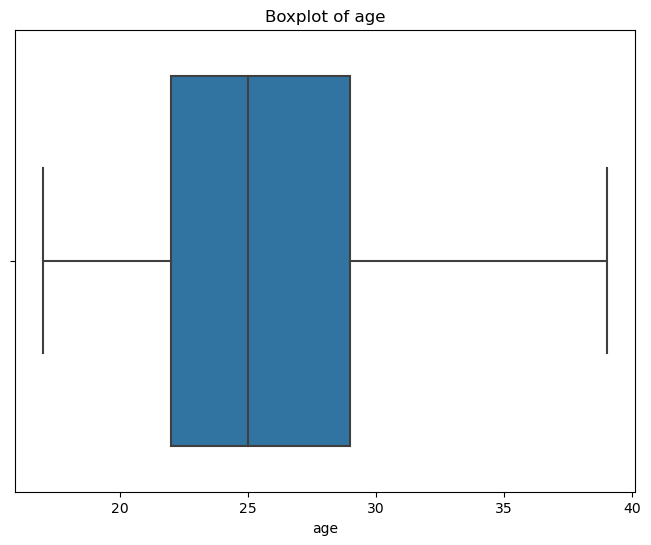

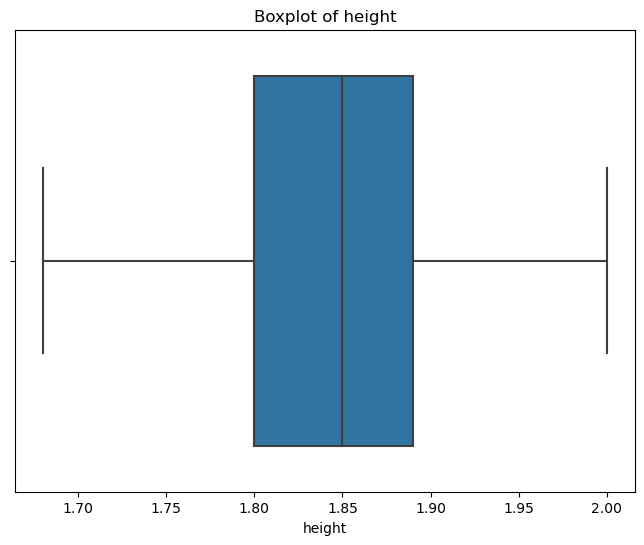

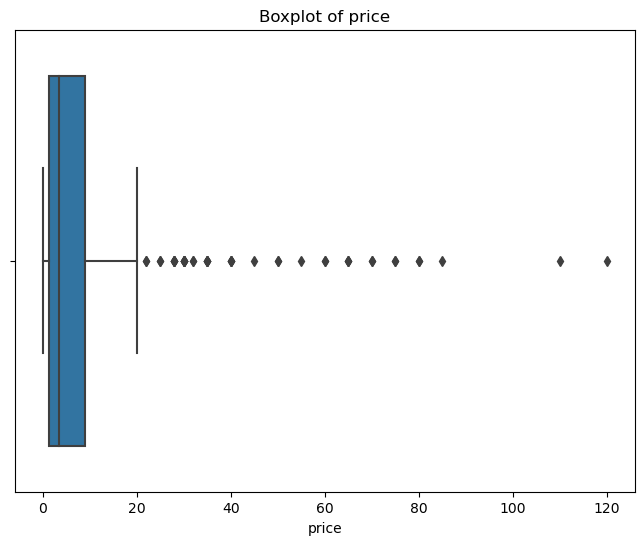

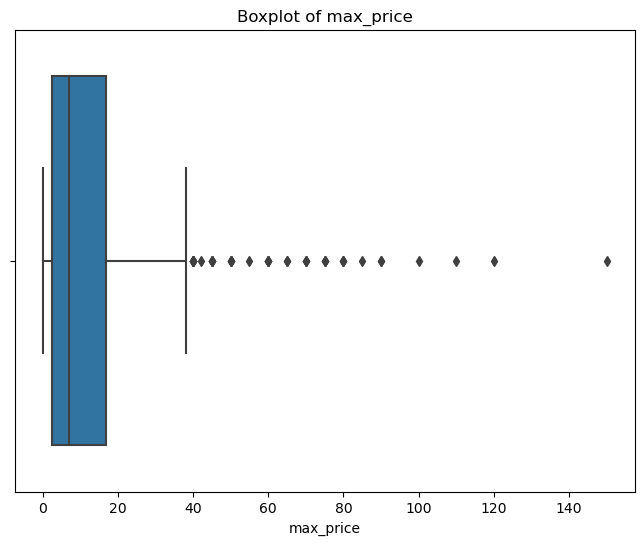

In [34]:
# Lista de columnas
columns = ['age', 'height', 'price', 'max_price']

# Crear un gráfico de caja para cada columna
for column in columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

Ahora realizaremos control de los outliers encontrados en price y max_price

In [35]:
def quit_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    ric = q3 - q1
    limite_inferior = q1 - 0.9 * ric
    limite_superior = q3 + 0.9 * ric
    df_off_outliers = df[(df[column] >= limite_inferior) & (df[column] <= limite_superior)]
    return df_off_outliers

df2A = df2.copy()

df2A = quit_outliers(df2A, 'price')
df2A = quit_outliers(df2A, 'max_price')


Validamos nuevamente las columnas "price" y "max_price"

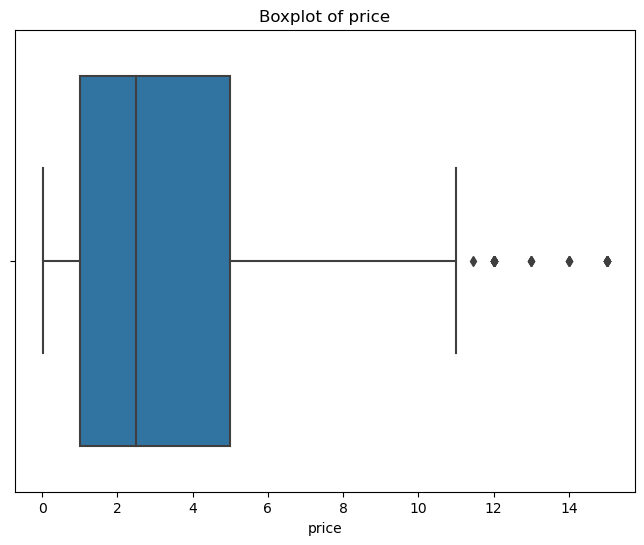

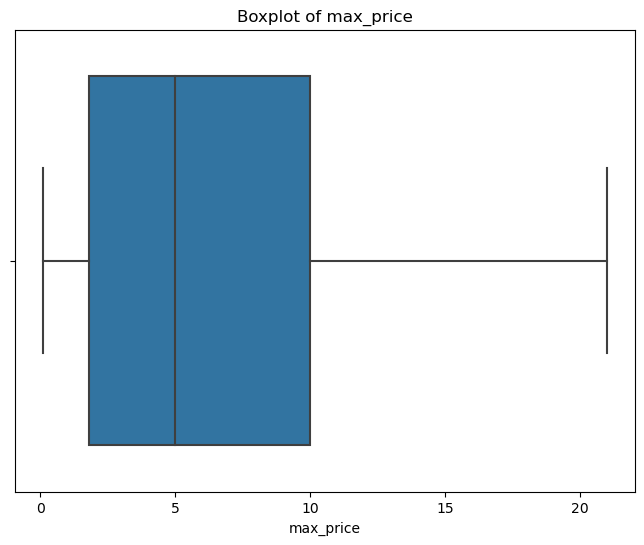

In [36]:
# Lista de columnas
columns = ['price', 'max_price']

# Crear un gráfico de caja para cada columna
for column in columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df2A[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [37]:
df2A.shape

(413, 174)

Tras la limpieza y analizar los cambios , se toma la decicion de mantener los outliers ya que tienen un gran efecto en los quartiles y la mediana de los datos sumado a la gran cantidad de datos que se pierden, aproximadamente un 20%. 

## Fase 3 : Data analitycs

Ahora generamos un mapa de calor para iddentificar la correlacion entre las columnas

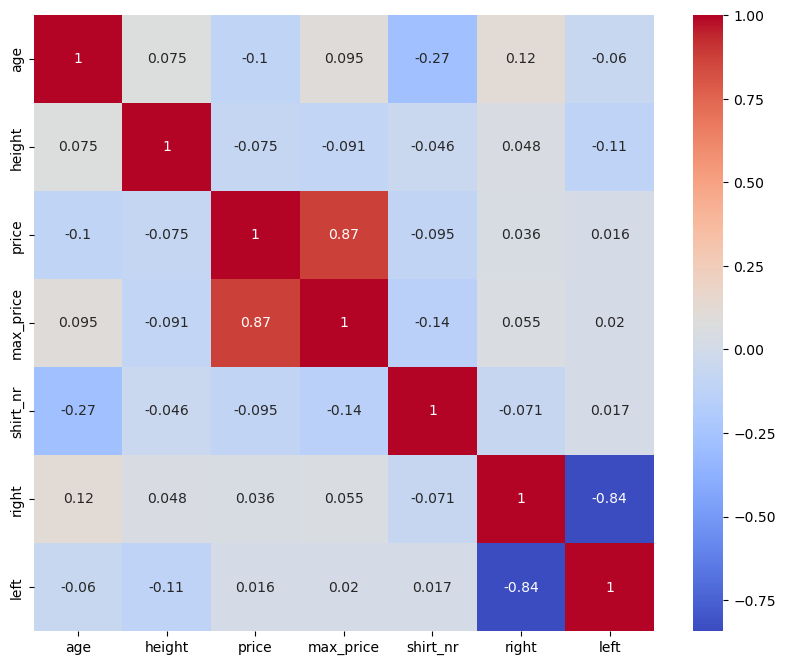

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecciona las columnas
selected_columns = ['age', 'height', 'price', 'max_price', 'shirt_nr', 'right', 'left']
df_selected = df2[selected_columns]

# Calcula la matriz de correlación
correlation_matrix = df_selected.corr()

# Crea el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

A partir de las correlaciones generaremos graficos para analizar los datos. 

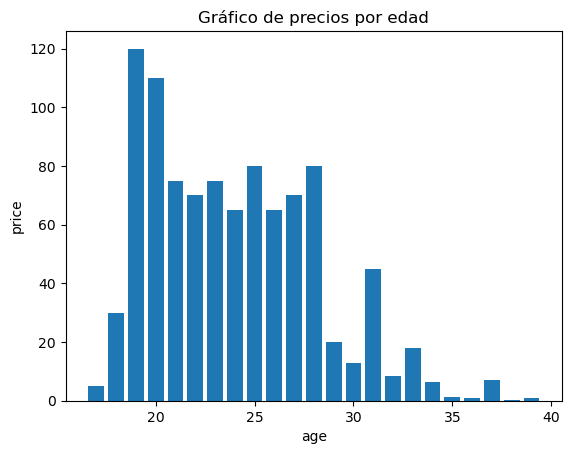

In [39]:
plt.bar(df2['age'], df['price'])
plt.title('Gráfico de precios por edad')
plt.xlabel('age')
plt.ylabel('price')


plt.show()

Se identifica que los futbolistas con 19 y 20 años presentan un valor mayor en comparacion al resto. 

Text(0, 0.5, 'Valor promedio de jugador')

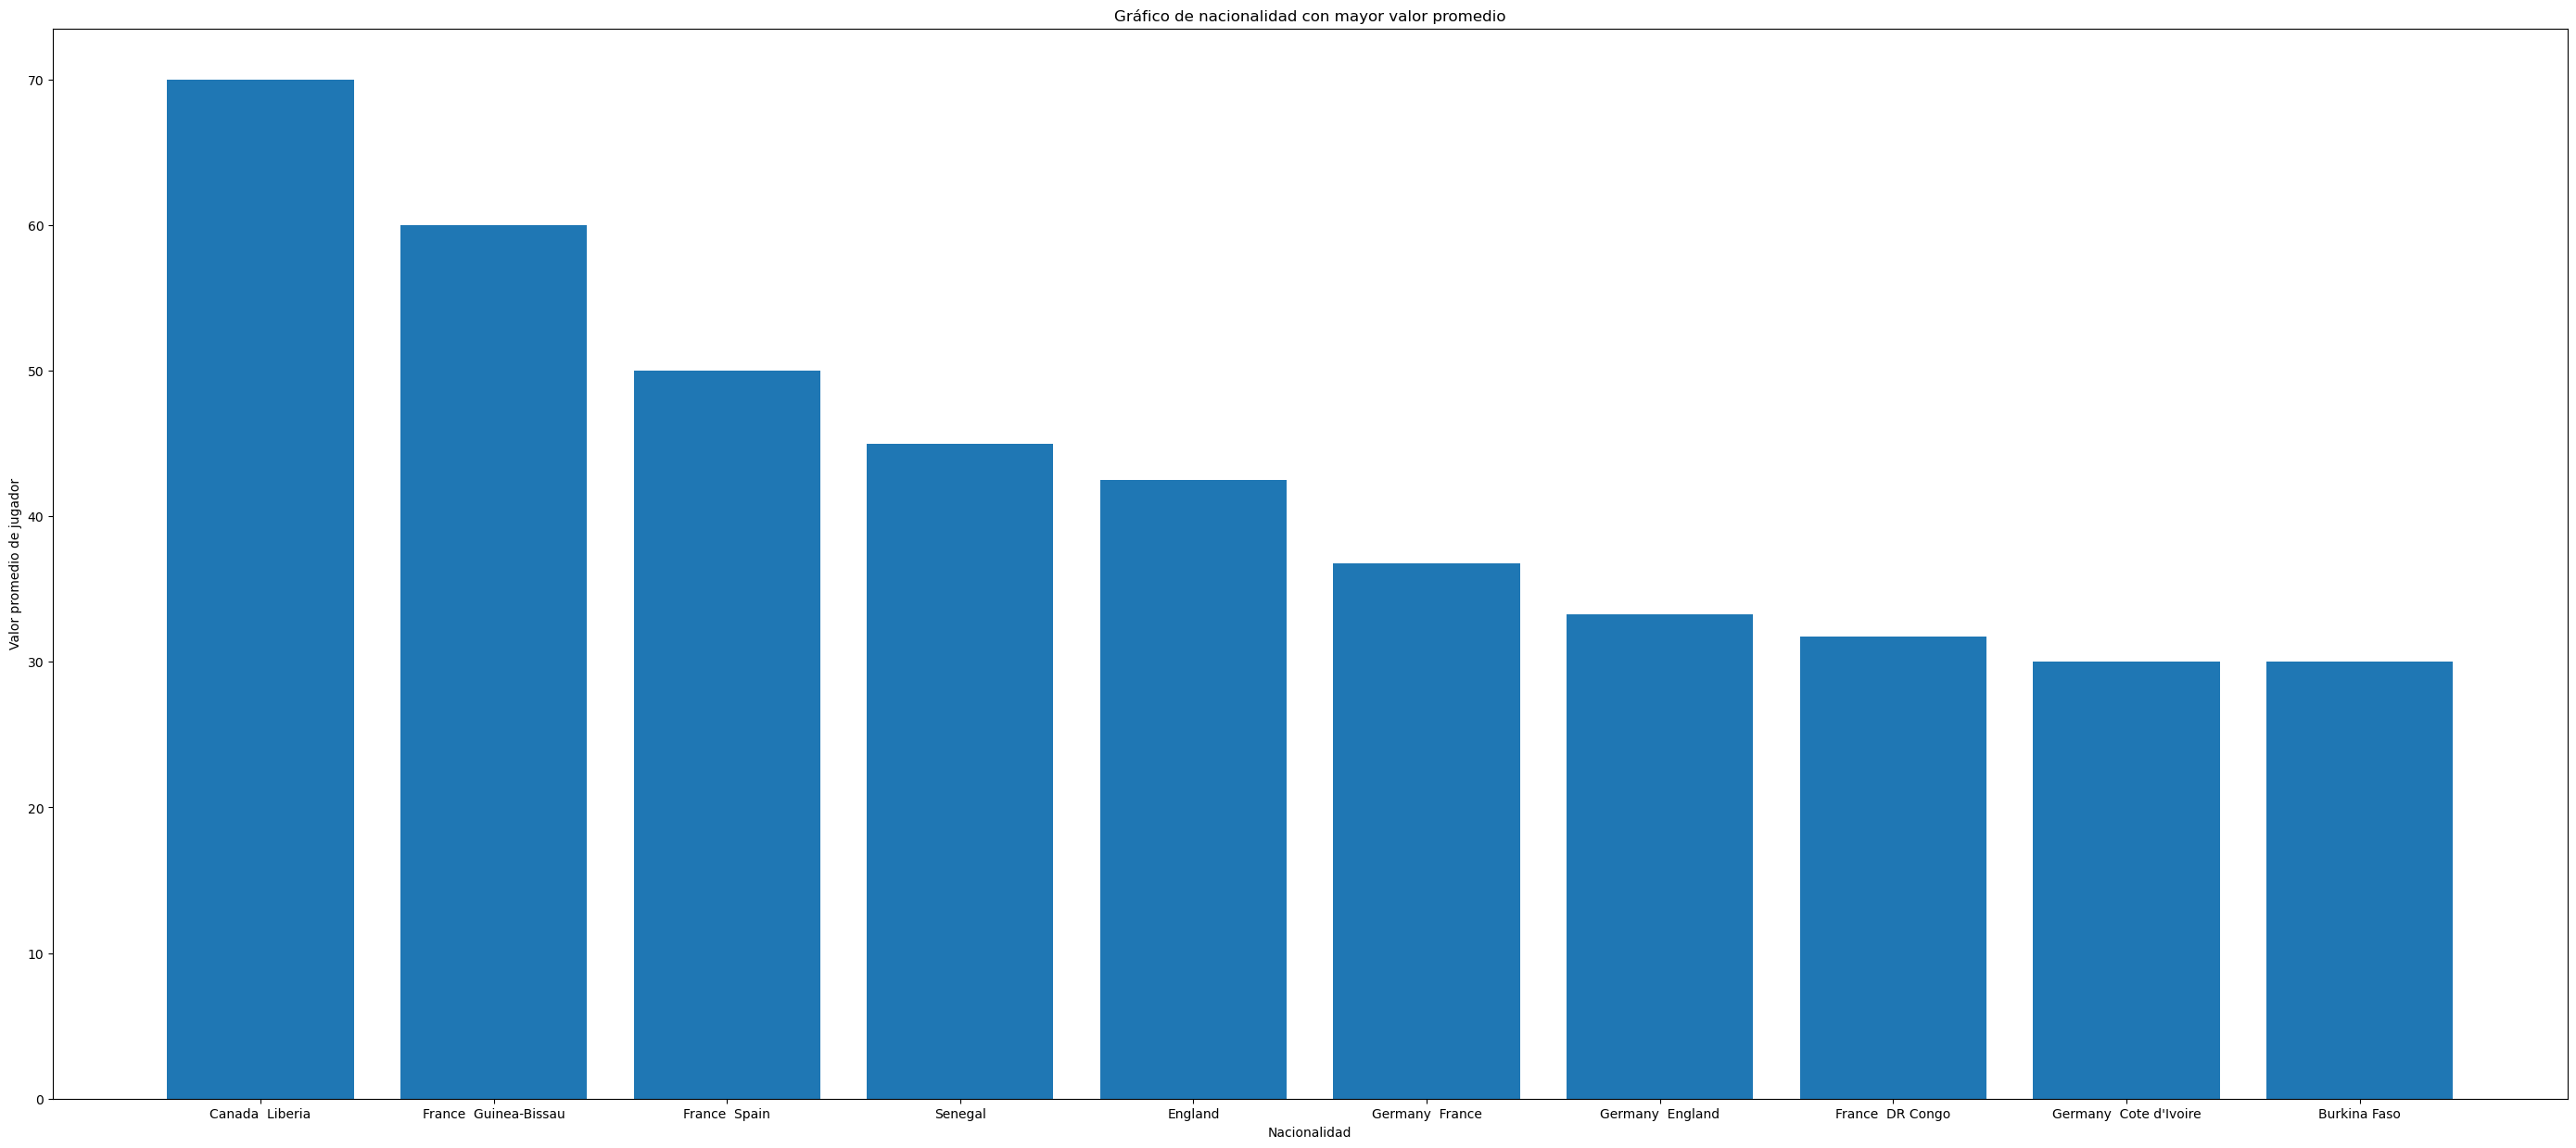

In [40]:
Price_avg_nacionality = df2.groupby('nationality')['price'].mean().reset_index()

# Ordenar en orden descendente y seleccionar las primeras 10 filas
Price_avg_nacionality = Price_avg_nacionality.sort_values('price', ascending=False).head(10)

plt.figure(figsize=(35, 15)) 
plt.bar(Price_avg_nacionality['nationality'],Price_avg_nacionality['price'] )
plt.title('Gráfico de nacionalidad con mayor valor promedio')
plt.xlabel('Nacionalidad')
plt.ylabel('Valor promedio de jugador')

Identificamos que los jugadores de mayor costo promedio son de nacionalidad Canada-liberia , frances- G.B y franco-española. 

Generamos un grafico para conocer se distribuyen los jugadores entre las diferentes posiciones

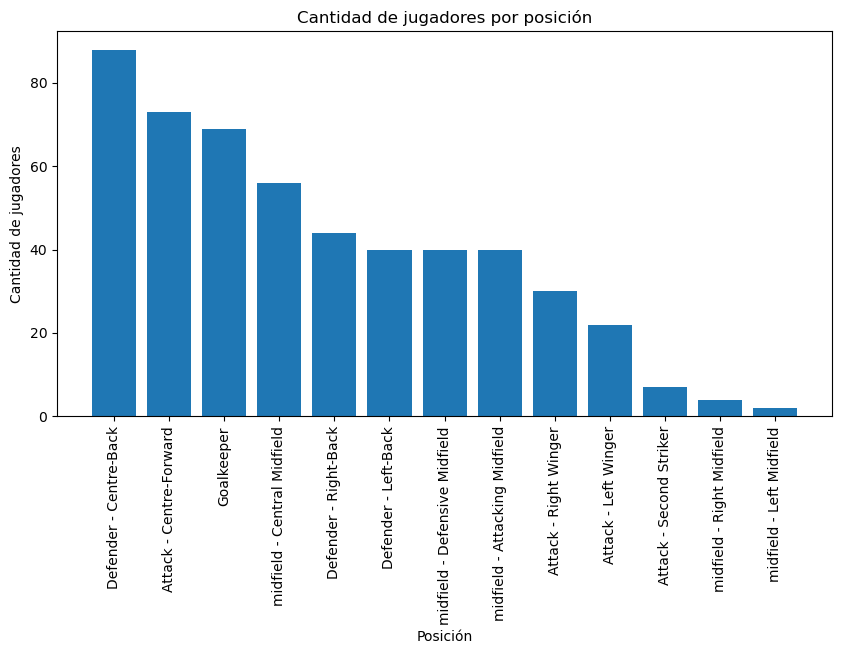

In [41]:
# Contar la cantidad de jugadores por posición
players_per_position = df['position'].value_counts()

plt.figure(figsize=(10, 5))
plt.bar(players_per_position.index, players_per_position.values)
plt.title('Cantidad de jugadores por posición')
plt.xlabel('Posición')
plt.ylabel('Cantidad de jugadores')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para que sean legibles
plt.show()

Identificamos que los jugadores que se desempeñan de defensor central predominan en la bundesliga. 

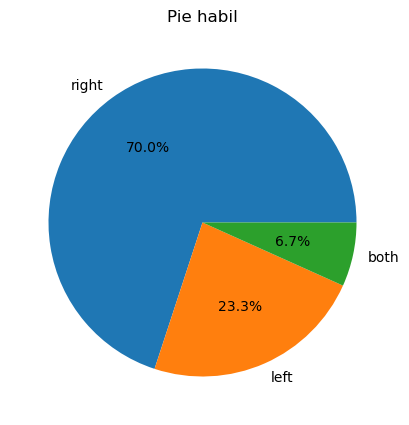

In [42]:
players_per_foot = df['foot'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(players_per_foot, labels=players_per_foot.index, autopct='%1.1f%%')
plt.title('Pie habil')
plt.show()

Mas de la mitad de los jugadores de la liga es de pierna habil la derecha, mientras aproximadamente un cuerta es de zurdo y un pequeño porcentaje se identifica como ambidiestro. 

## Fase 4: Modeling

Importamos las librerias necesarias para los modelos

In [43]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

Creamos una nueva variable de trabajo

In [44]:
df3 = df2

Ahora quitaremos las columnas del tipo objatct ya que en esta fase no seran necesarias

In [45]:
df3 = df3.drop(['nationality', 'position', 'foot','club','place_of_birth','joined_club'] , axis=1 )

Buscaremos predecir los valores de price y max_price de los jugadores de la bundesliga, para eso primero identificamos que los valores de estas columnas son del tipo "Numerica Continua".

Dado el tipo de varible utilizaremos utilizaremos los modelos de regresion lineal , SVR y Arbol de decicion para regresion. 

Lo primero sera identificar las columnas que tengan mejor correlacion con la columna Price.

In [46]:
# Calcular la matriz de correlación
correlation_matrix = df3.corr()

# Crear un DataFrame a partir de la matriz de correlación
correlation_df = pd.DataFrame(correlation_matrix)

# Encontrar las correlaciones de la columna 'price' con todas las demás
column_corr = correlation_df['price']

# Ordenar por valor absoluto, tanto positivas como negativas
column_corr = column_corr.reindex(column_corr.abs().sort_values(ascending=False).index)

top_10_corr = column_corr.head(10)

print(top_10_corr)

price                    1.000000
max_price                0.870613
Canada  Liberia          0.186191
England                  0.178636
Goalkeeper              -0.169183
France  DR Congo         0.157942
France  Guinea-Bissau    0.155916
Germany  England         0.150300
France  Guadeloupe       0.144758
Germany                 -0.136593
Name: price, dtype: float64


Ahora que identificamos las columnas con mejor correlacion con "price", procederemso a generar las matrices 

In [47]:
columna = df3['price']
matriz_y=columna.values.reshape(-1,1)

In [48]:
columna = ['max_price','Germany','England','Goalkeeper']
matriz_X= df3[columna].to_numpy()

Establecimos un tamaño de muestra del 20%

In [49]:
X = matriz_X
y = matriz_y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Asignamos los modelos a las variables

In [50]:
lr = LinearRegression()
svr = SVR()
dtr = DecisionTreeRegressor()

Aplicamos finalmente los modelos

In [51]:
lr.fit(X_train, y_train)
svr.fit(X_train, y_train)
dtr.fit(X_train, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


DecisionTreeRegressor()

## Fase 5: Evaluation

In [52]:
models = [lr, svr, dtr]
for model in models:
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{model.__class__.__name__}: MAE={mae:.2f}, MSE={mse:.2f}, R2={r2:.2f}')

LinearRegression: MAE=3.74, MSE=32.78, R2=0.82
SVR: MAE=4.49, MSE=93.54, R2=0.49
DecisionTreeRegressor: MAE=3.30, MSE=33.22, R2=0.82


Segun las metricas que obtubimos de los parametros de medicion, el modelo de LinearRegression es el que presenta mejor rendimiendo debido:

MAE: la magnitud de error del modelo no es la mas baja ya que esta la posee DecisionTreeRegressor por 0.44 de diferencia, una magnitud de diferencia que puede dar mas credito al otro modelo pero lamentablemente por si sola estra metrica no se puede mantener ya que en la demas el rendimiento de LinearRegression es mejor.

MSE: En este critrio el rendimiento de LinearRegression es mucho mejor que el de los demas por una diferencia bastente grande con el SVR pero muy minima con el modelo de DecisionTreeRegressor pero algual que el criterio anterios por si solo no se puede mantener por tener mejor rendimiento solo bajo este criterio

R2: En este criterio los mejores son LinearRegression y  DecisionTreeRegressor con 0.82 lo significa que pueden explicar mas del 80% de variablilidad de los precios de los jugadores.

Conclusiones: Por metricas de los criterios los mejores modelos son LinearRegression y DecisionTreeRegressor pero por mediciones exactas es mejor el primero ya que posee mejor rendimiendo en MSE respecto a los demas a comparacion del MAE de DecisionTreeRegressor en comparacion al resto.

Visualizamo el dato real contra la predicción de LinearRegression y DecisionTreeRegressor

In [57]:
y_pred0 = dtr.predict(X_test)

In [55]:
# Hacemos predicciones con el conjunto de datos de test
y_pred = lr.predict(X_test)

Text(0.5, 0, 'Index')

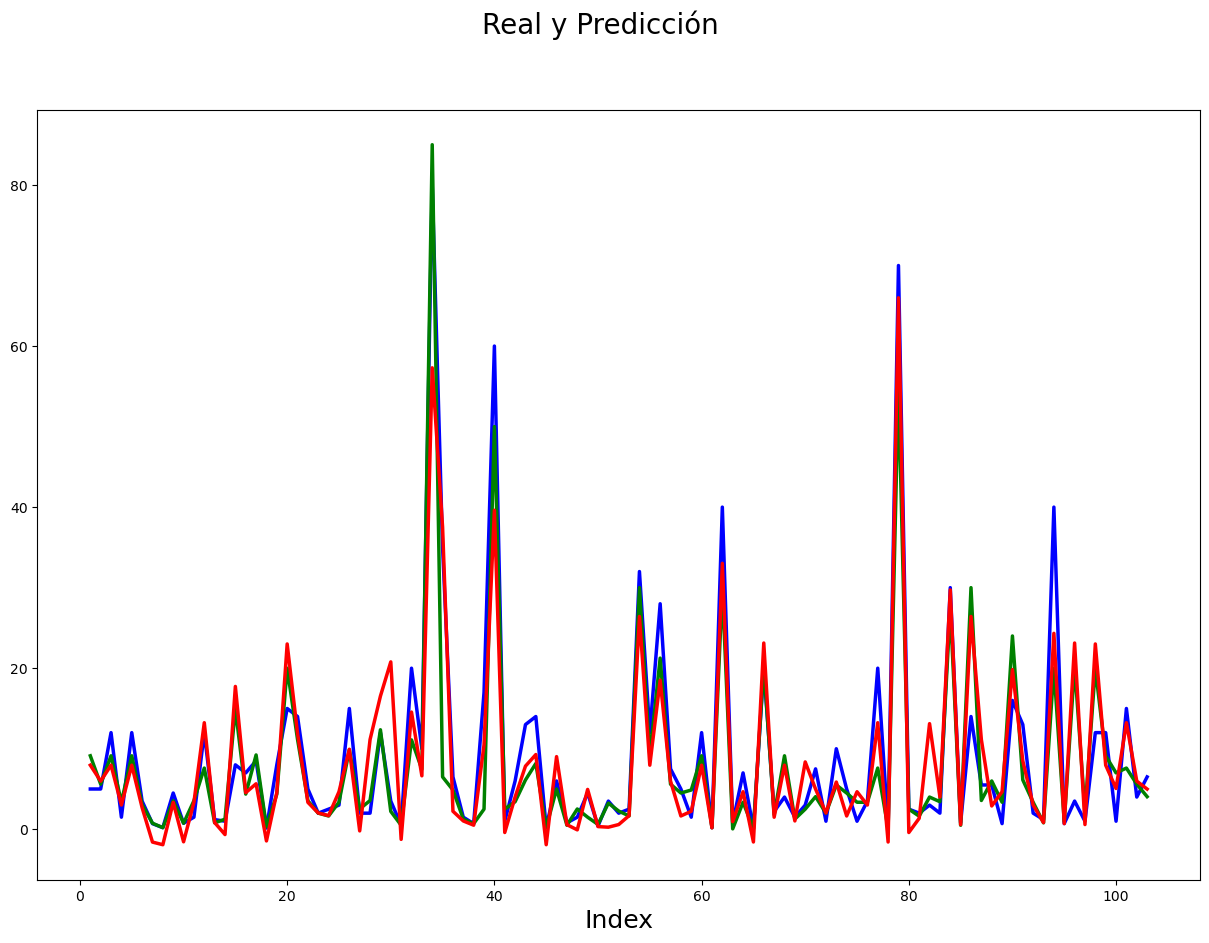

In [58]:
import numpy as np

# Real contra predicción
plt.figure(figsize = (15,10))

c = np.arange(1, len(X_test) + 1, 1) # generating index

plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred0, color="green", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red", linewidth=2.5, linestyle="-")
plt.suptitle('Real y Predicción', fontsize=20)
plt.xlabel('Index', fontsize=18)